# Notes
- Up to 5 discharge reports by HADM_ID   
- Up to 39 ICD codes by HADM_ID 

In [2]:
import numpy as np
import pandas as pd
import ipyleaflet as ipyl
import ipywidgets as ipyw
from sklearn.model_selection import train_test_split
import ggplot, datetime, time
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

//anaconda/lib/python3.5/site-packages/ggplot/components/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading dataset

In [3]:
# Loading the original datasets
tot_nrows = 91691299
notes = pd.read_csv('../data/NOTEEVENTS.csv', nrows =  50000)
diagnoses = pd.read_csv('../data/DIAGNOSES_ICD.csv')

In [4]:
notes

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
5,179,53181,170490,2172-03-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-3-5**] D...
6,180,20646,134727,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] ...
7,181,42130,114236,2150-03-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2150-2-25**] ...
8,182,56174,163469,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
9,183,56174,189681,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...


In [5]:
diagnoses

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
5,1302,109,172335,6.0,2762
6,1303,109,172335,7.0,7100
7,1304,109,172335,8.0,2767
8,1305,109,172335,9.0,7243
9,1306,109,172335,10.0,45829


In [6]:
np.unique(notes.CATEGORY)

array(['Discharge summary'], dtype=object)

In [7]:
# merging diagnoses with HADM
#df = pd.merge(left, how='inner', on=)

# Completeness

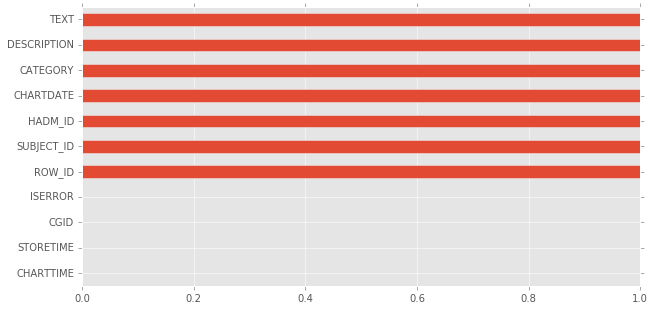

In [8]:
(notes.count(axis=0)/notes.shape[0]).sort_values().plot.barh(figsize = (10, 5))

In [9]:
diagnoses.HADM_ID.value_counts()

127713    39
194067    39
101813    39
113427    39
187452    39
188176    39
101974    39
162564    39
124500    39
112508    39
198618    39
156625    39
118529    39
141249    39
102365    39
160707    39
137134    39
194917    39
188623    39
197562    39
124079    39
134331    39
133854    39
141958    39
145445    39
105916    39
111892    39
179548    39
148188    39
101216    39
          ..
158660     1
174628     1
126260     1
168792     1
179808     1
149592     1
172582     1
148607     1
156586     1
161090     1
169310     1
197089     1
140107     1
100159     1
170307     1
111910     1
159800     1
105970     1
114985     1
110656     1
115215     1
104435     1
160049     1
113445     1
174379     1
174400     1
197493     1
110368     1
181690     1
176791     1
Name: HADM_ID, Length: 58976, dtype: int64

In [10]:
notes.HADM_ID.value_counts()

126258    5
169646    5
154221    5
138312    5
166043    5
178053    5
102588    4
164627    4
152180    4
148914    4
137674    4
113071    4
161335    4
181330    4
159286    4
149888    4
160481    4
183253    4
195209    4
125400    4
154728    4
163787    4
195075    4
133880    4
143282    4
100281    4
126678    4
180959    4
171910    4
164955    4
         ..
131253    1
133300    1
143539    1
118959    1
114861    1
131289    1
194200    1
190664    1
123081    1
194762    1
147677    1
194815    1
164069    1
176355    1
178402    1
138710    1
108768    1
151775    1
153822    1
149724    1
192715    1
155865    1
137430    1
124353    1
141520    1
118991    1
121038    1
180429    1
182476    1
131072    1
Name: HADM_ID, Length: 47716, dtype: int64

# Name Entity Recognition

Found here https://github.com/AnthonyMRios/pymetamap   
Need to download this: https://metamap.nlm.nih.gov/MainDownload.shtml   
and before that need to get authorization -> takes 3 days

In [15]:
from pymetamap import MetaMap

In [16]:
mm = MetaMap.get_instance('/opt/public_mm/bin/metamap12')

In [17]:
notes.TEXT[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [18]:
concepts,error = mm.extract_concepts(notes.TEXT[0],[1,2])

FileNotFoundError: [Errno 2] No such file or directory: '/opt/public_mm/bin/metamap12'